In [1]:
import pandas as pd
df = pd.read_csv(r'/Users/sushovanadhikari/Desktop/start_over_workspace/hw4/Ap.csv')
print(df)

       YYYYMMDD  t1 [days]  Ap1 [2 nT]  YYYYMMDD.1  t2 [days]  Ap2 [2 nT]
0      19320101          1          15    19830101          1          11
1      19320102          2          26    19830102          2           7
2      19320103          3          11    19830103          3          11
3      19320104          4           4    19830104          4           9
4      19320105          5           3    19830105          5           6
...         ...        ...         ...         ...        ...         ...
13875  19691227      13876           9    20201227      13876           5
13876  19691228      13877           4    20201228      13877           6
13877  19691229      13878           4    20201229      13878           6
13878  19691230      13879           2    20201230      13879           8
13879  19691231      13880           3    20201231      13880           3

[13880 rows x 6 columns]


In [2]:
from collections import defaultdict
# Create a dictionary to store the total values and counts for each month
monthly_totals = defaultdict(int)
monthly_counts = defaultdict(int)

In [3]:
year_month2 = df['YYYYMMDD']
ap2 = df['Ap1 [2 nT]']
# year_month2 = df['YYYYMMDD']
# ap2 = df['Ap2 [2 nT]']
data = list(zip(year_month2, ap2))
for date, value in data:
    year_month2 = str(date)[:6]  # Extract the year and month from the date
    monthly_totals[year_month2] += value
    monthly_counts[year_month2] += 1

# Calculate the average values for each month
monthly_averages = {
    month: round(monthly_totals[month] / monthly_counts[month],2)
    for month in monthly_totals
}

In [4]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(monthly_averages.items()), columns=['year_month_1', 'avg_ap1'])
print(df)

    year_month_1  avg_ap1
0         193201    11.00
1         193202    11.62
2         193203    18.32
3         193204    17.30
4         193205    14.58
..           ...      ...
451       196908     7.97
452       196909    14.97
453       196910     8.74
454       196911     9.93
455       196912     6.81

[456 rows x 2 columns]


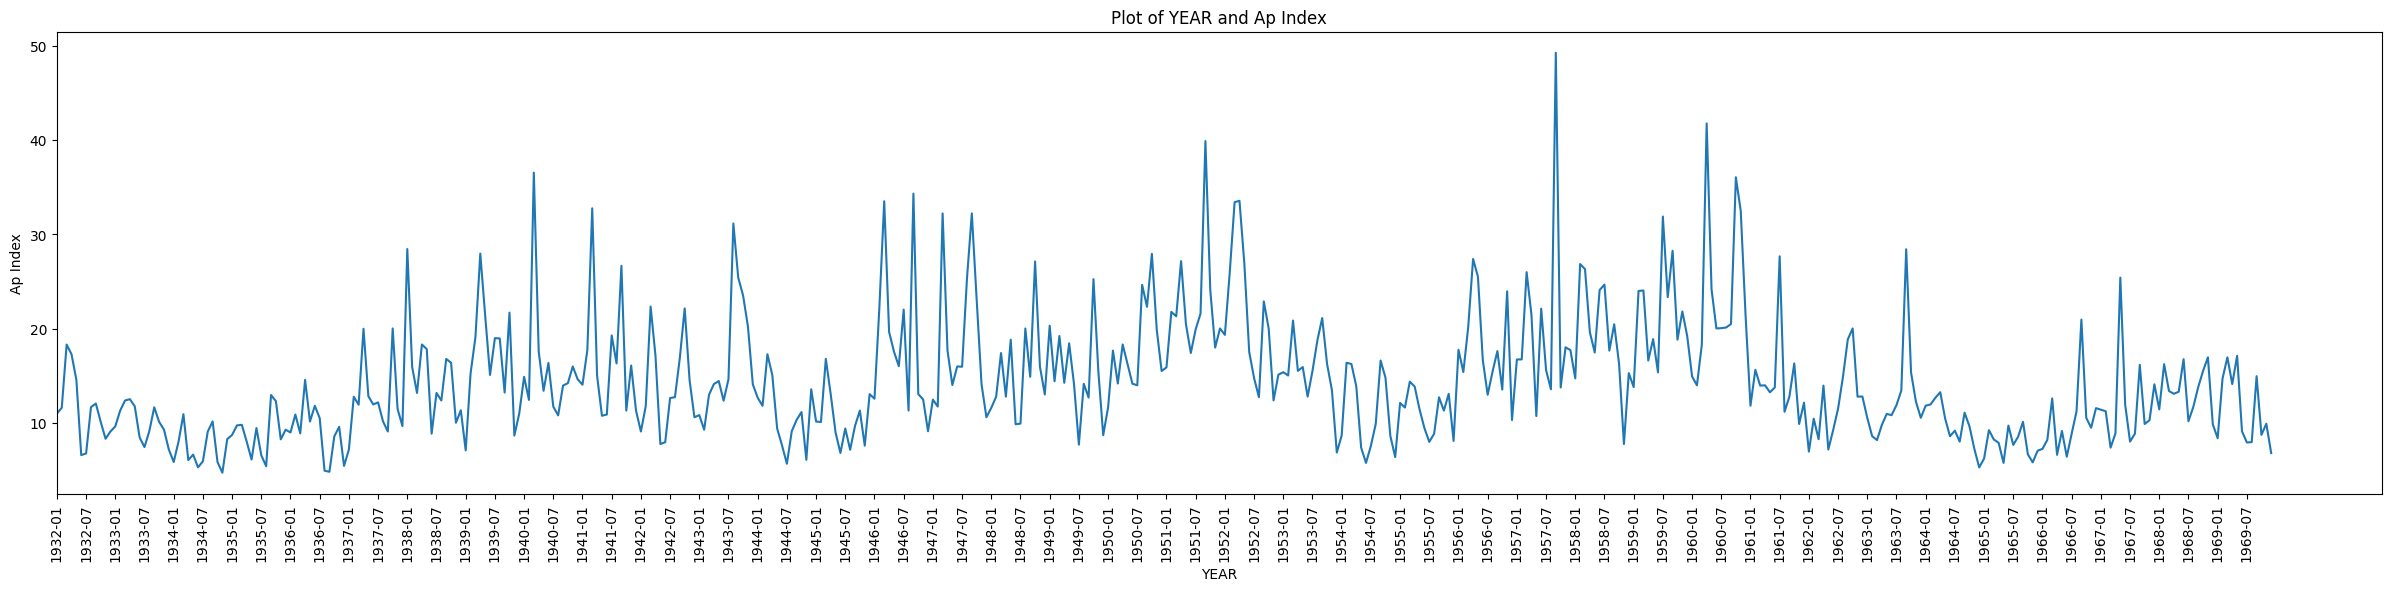

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataframe called 'df' with columns 'column1' and 'column2'

# Set the figure size to adjust the width of the plot
plt.figure(figsize=(30, 6))  # Adjust the width (first value) as needed

# Plotting the columns using Seaborn
sns.lineplot(data=df, x=[item[:4] + '-' + item[4:] for item in df['year_month_1']], y=df['avg_ap1'])


tick_positions = range(0, len(df['year_month_1']), 6)
plt.xticks(tick_positions, rotation=90)  # Set the x-axis tick positions and rotate the labels by 45 degrees

# Set lower limit of x-axis to 0
plt.xlim(left=0)


# Adding labels and title
plt.xlabel('YEAR')
plt.ylabel('Ap Index')
plt.title('Plot of YEAR and Ap Index')

# Displaying the plot
plt.show()




In [6]:
import numpy as np
# Assuming your Ap index data is stored in a numpy array called 'ap_data'
# Compute the FFT
fft_result = np.fft.fft(df['avg_ap1'])

In [7]:
# Compute the power spectrum
power_spectrum = np.abs(fft_result)**2

In [8]:
# Assuming the sampling rate is known (e.g., one data point per day) our case: 1 data point per month
sampling_rate = 1.0  # Adjust if needed

# Generate the frequency axis
frequency_axis = np.fft.fftfreq(len(df['avg_ap1']), d=1/sampling_rate)

257


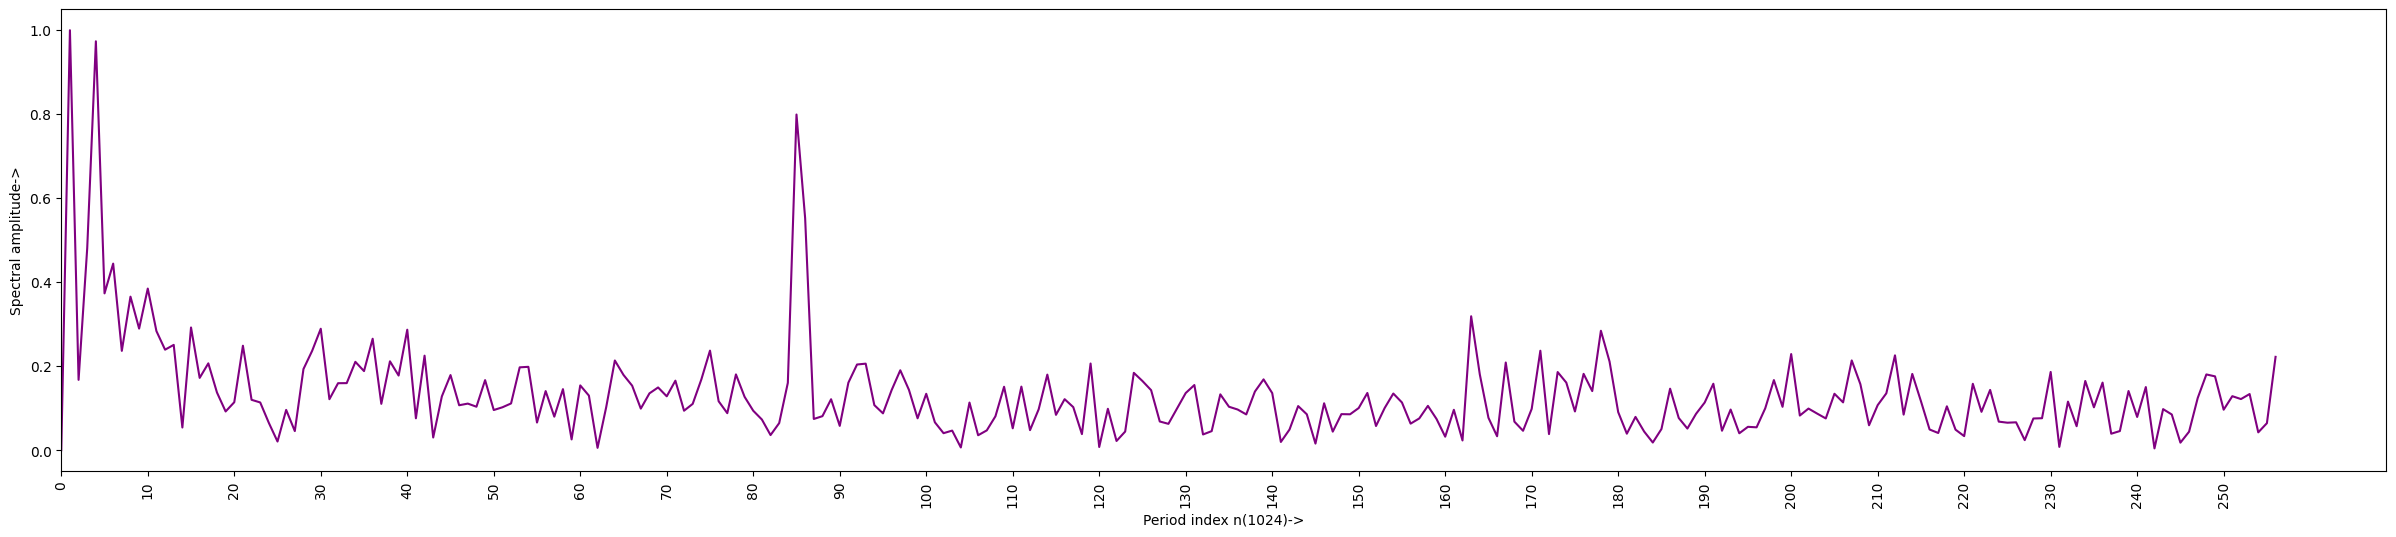

In [9]:
from numpy.fft import fft
from scipy.signal import detrend

y = df['avg_ap1']

# Detrend data by subtracting the mean
detrended_data = y - np.mean(y)

# Calculate next power of 2
N = len(detrended_data)
N2 = 2 ** int(np.ceil(np.log2(N)))

# Zero-pad data to next power of 2
padded_data = np.zeros(N2)
padded_data[:N] = detrended_data

# Calculate FFT
Y = fft(padded_data)

# Calculate spectral amplitude
P = np.abs(Y[:N2 // 2 + 1])

# Scale power spectrum between 0 and 1 using a logarithmic transformation
# P_scaled = np.log10(P + 1) / np.log10(np.max(P) + 1)
P_scaled = (P - np.min(P)) / (np.max(P) - np.min(P))
print(len(P_scaled))

# Calculate period index
n = np.arange(0, N2 // 2 + 1)
# n = N2 / n

plt.figure(figsize=(30, 6)) 

tick_positions = range(0, len(n), 10)
plt.xticks(tick_positions, rotation=90)  # Set the x-axis tick positions and rotate the labels by 45 degrees


# Plot spectral amplitude as a function of period index
plt.plot(n, P_scaled, color='purple')
# plt.plot(n, P, color='purple')
plt.xlabel('Period index n(1024)->')
plt.ylabel('Spectral amplitude->')
# Set lower limit of x-axis to 0
plt.xlim(left=0)
plt.show()